# Euclidean TSP with Biased RKGA: A minimal demo

In [1]:
from gasuite.brkga import Termination_criteria, BRKGA_Population_size, BRKGA_TSP
from gasuite.problems import geometric_tsp
import numpy as np

In [2]:
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt

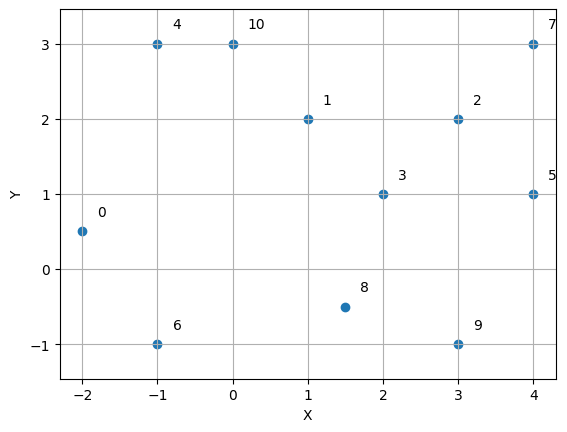

In [3]:
pcd = np.array([
            [-2, 0.5],
            [1, 2],
            [3, 2],
            [2, 1],
            [-1, 3],
            [4, 1],
            [-1, -1],
            [4, 3],
            [1.5, -0.5],
            [3, -1],
            [0, 3]
        ], dtype = np.float32
    )

plt.scatter(*pcd.T)
for i, (x,y) in enumerate(pcd):
    plt.text(x+0.2,y+0.2, str(i))
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [4]:
# this is just one of many possible representations, obtained by eye-balling
optim_tour = np.array([1, 3, 2, 7, 5, 9, 8, 6, 0, 4, 10], dtype=np.int64) # np.arange(len(pcd))
true_optim_cost = geometric_tsp.eval_tour_cost(optim_tour, pcd)
print("True optimal cost:", true_optim_cost)

True optimal cost: 19.51892852783203


In [5]:
population_cfg = BRKGA_Population_size(total=100, elite = 4, mutant = 25)
print(population_cfg)
print(" ==> number of crossovers:", population_cfg.xover)

term_criteria = Termination_criteria(
    max_num_gen=500, 
    earlyTerm_improvement_convergence=1e-6, 
    earlyTerm_patience=100)

res = BRKGA_TSP(len(pcd), lambda rank : geometric_tsp.eval_tour_cost(rank, pcd),
                population_cfg, term_criteria, crossover_bias=0.7,
                rng=np.random.default_rng(12345))

print("Solver exited because", res.reason)
allTimeBest_cost = res.cost_stats.get_all_time_best()
print("Final result", res.optimizer)
print("Number of iterations:", res.cost_stats.num_completed_iterations)
print("Cost of the returned solution:", allTimeBest_cost, f"(+{(allTimeBest_cost - true_optim_cost)/true_optim_cost*100: .2f}%)")

# just to be sure the optimizer is reasonable
assert len(res.optimizer) == len(pcd)
# TODO: check if it's a real permutation
assert geometric_tsp.eval_tour_cost(res.optimizer, pcd) == res.cost_stats.get_all_time_best()

BRKGA_Population_size(total=100, elite=4, mutant=25)
 ==> number of crossovers: 71
Solver exited because Termination_decision.stop_on_sufficient_cost_convergence
Final result [10  4  0  6  8  9  5  7  2  3  1]
Number of iterations: 108
Cost of the returned solution: 19.51892852783203 (+ 0.00%)


Remarks: 
* The functions in `geometric_tsp` also support Manhattan, and max/inf-norms
* Try run it again several time (wit
h different seeds), you will probably find the optimal solution very soon.
* You can also define your own cost function very easily, e.g., for "open TSP"

## Learning curve

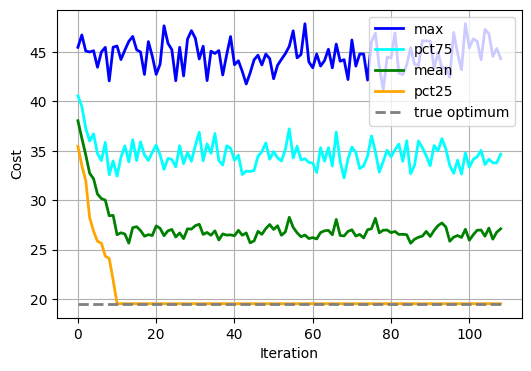

In [6]:
_, ax = plt.subplots(figsize=(6,4))
res.cost_stats.visualize_learning_curve(ax, true_optim_cost, lw=2)
plt.show()